In [48]:
import pandas as pd
import glob
from datetime import datetime
import numpy as np

# path = r'data/경진대회_나주시_전력사용량 DATA1' # use your path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0, encoding='euc-kr')
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)

In [121]:
# 2017년 ~ 2018년 data 취합

path_list = [r'data/경진대회_나주시_전력사용량 DATA1', r'data/경진대회_나주시_전력사용량 DATA2', r'data/경진대회_나주시_전력사용량 DATA3']

li = []
for path in path_list:
    all_files = glob.glob(path + "/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0, encoding='euc-kr')
        li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/usr/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
frame.head()

,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력
0,20170901,15,전라남도,나주시,AA11동,AA279호,일반용(갑)저압,10,0.522,0.417,0
1,20170901,15,전라남도,나주시,AA1동,AA278호,일반용(갑)저압,5,0.014,0,0
2,20170901,15,전라남도,나주시,AA10동,AA328호,일반용(갑)저압,5,0.167,0.087,0
3,20170901,30,전라남도,나주시,AA11동,AA279호,일반용(갑)저압,10,0.370,0.371,0
4,20170901,30,전라남도,나주시,AA1동,AA278호,일반용(갑)저압,5,0.025,0,0


In [123]:
frame.tail()

,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력
67769093,20180930,1704,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN
67769094,20180930,1715,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0
67769095,20180930,1800,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0
67769096,20180930,1808,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN
67769097,20180930,2200,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0


In [124]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67769098 entries, 0 to 67769097
Data columns (total 11 columns):
날짜        int64
시간        int64
시/도       object
시/군/구     object
읍/면/동     object
고객(가칭)    object
계약종별      object
계약전력      int64
유효전력      float64
지상무효전력    object
진상무효전력    object
dtypes: float64(1), int64(3), object(7)
memory usage: 5.6+ GB


In [125]:
frame['날짜'] = pd.to_datetime(frame['날짜'], format="%Y%m%d")
frame['시간'] = frame['시간'].astype(str)

In [126]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67769098 entries, 0 to 67769097
Data columns (total 11 columns):
날짜        datetime64[ns]
시간        object
시/도       object
시/군/구     object
읍/면/동     object
고객(가칭)    object
계약종별      object
계약전력      int64
유효전력      float64
지상무효전력    object
진상무효전력    object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 5.6+ GB


## 전처리
---

### 1. datetime으로 변환

#### **Issue** 

- 날짜 : `20170228`
- 시간 : `2400`

> `20170301`+ `0000` 으로 변경하고 이를 `format = datetime64[ns]`으로 `datetime`이라는 새로운 column 생성 

In [127]:
frame.loc[frame['시간'] == '2400', '날짜'] = frame['날짜'] + pd.DateOffset(days=1)
frame['시간'] = frame['시간'].apply(lambda x : '0000' if '2400' in str(x) else str(x).zfill(4))
frame['datetime'] = pd.to_datetime(frame['날짜'].astype(str) + ' ' + frame['시간'].apply(lambda x: x[0:2]) + ':' + frame['시간'].apply(lambda x: x[2:]))

In [128]:
frame.tail()

,날짜,시간,시/도,시/군/구,읍/면/동,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력,datetime
67769093,2018-09-30,1704,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN,2018-09-30 17:04:00
67769094,2018-09-30,1715,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0,2018-09-30 17:15:00
67769095,2018-09-30,1800,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0,2018-09-30 18:00:00
67769096,2018-09-30,1808,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,NaN,NaN,NaN,2018-09-30 18:08:00
67769097,2018-09-30,2200,전라남도,나주시,AA48동,AA1370호,산업용(갑)저압,8,0.0,0,0,2018-09-30 22:00:00


In [135]:
frame = frame.sort_values(by = 'datetime')

In [149]:
frame[frame['고객(가칭)'] == 'AA1370호']['읍/면/동'].value_counts()

AA104동    2947
AA102동    2895
AA111동    2851
AA58동     2768
AA120동    2471
AA126동    2253
AA48동     1805
Name: 읍/면/동, dtype: int64

### 2. 고객 분류

#### **Issue** 

- 읍/면/동 : 비식별화
- 고객(가정) :  비식별화

> `읍/면/동` + `고객(가정)` 을 **하나의 user**로 봐야하기 때문에, 이를 고려한 새로운 **`user`**라는 새로운 column 생성

In [130]:
frame['user'] = frame['읍/면/동'] + ' ' + frame['고객(가칭)']

In [131]:
len(frame['user'].value_counts())

19828

- `user` : 총 19828 개의 user로 구분됨

이하 `시/군/구`, `읍/면/동` 및 `고객(가칭)`에 대해 범주별로 갯수 확인한 결과

- `시/군/구` : 단 1개
- `읍/면/동` : 총 13개의 동으로 구분됨, (max = `3893218`, min = `198203`)
- `고객(가칭)` :  총 877개의 고객으로 구분됨, (max = `34859`, min = `2025`)

In [132]:
frame['시/군/구'].value_counts()

나주시    67769098
Name: 시/군/구, dtype: int64

In [133]:
len(frame['읍/면/동'].value_counts())

128

In [134]:
len(frame['고객(가칭)'].value_counts())

2263

### 3. 필요한 Column 설정

1. 영어로 통일 필요
2. 불필요한 컬럼 협의 필요

In [136]:
column_list = ['datetime', 'user', '계약종별', '계약전력', '유효전력', '지상무효전력', '진상무효전력']

In [137]:
new_frame = frame[column_list]

In [138]:
new_frame.head()

,datetime,user,계약종별,계약전력,유효전력,지상무효전력,진상무효전력
16436859,2017-01-01 00:15:00,AA4동 AA95호,주택용전력,3,0.005,0,0
16436642,2017-01-01 00:15:00,AA4동 AA107호,일반용(갑)저압,5,0.124,0.081,0
16436641,2017-01-01 00:15:00,AA4동 AA106호,주택용전력,3,0.020,0,0
16436640,2017-01-01 00:15:00,AA3동 AA105호,일반용(갑)저압,5,0.105,0.057,0
16436639,2017-01-01 00:15:00,AA3동 AA104호,일반용(갑)저압,5,0.210,0.001,0


## EDA 

- 결측값 확인
- 목표 : target은 12 hour 이후의 예측
- LSTM 사용하면 학습에 필요한 sequence 고려해야함 (sequence = ?)

user별로 `N/A` 값 분포 확인 필요

In [139]:
new_frame['user'].value_counts()

AA10동 AA293호      23255
AA8동 AA75호        23244
AA8동 AA24호        23241
AA8동 AA9호         23240
AA8동 AA18호        23240
AA8동 AA27호        23056
AA8동 AA30호        23047
AA8동 AA20호        23047
AA8동 AA22호        23042
AA8동 AA21호        23040
AA8동 AA23호        23037
AA3동 AA51호        22833
AA5동 AA74호        22509
AA8동 AA25호        22249
AA11동 AA114호      20840
AA8동 AA169호       20509
AA11동 AA317호      20473
AA11동 AA109호      20308
AA11동 AA106호      20296
AA8동 AA12호        20265
AA8동 AA4호         20264
AA7동 AA54호        20262
AA8동 AA19호        20260
AA8동 AA17호        20260
AA8동 AA5호         20256
AA8동 AA8호         20255
AA8동 AA836호       20205
AA11동 AA104호      20129
AA8동 AA168호       20098
AA11동 AA311호      19968
                  ...  
AA104동 AA789호        14
AA98동 AA305호         13
AA25동 AA561호         12
AA103동 AA1602호        9
AA112동 AA1658호        8
AA103동 AA1608호        7
AA112동 AA1656호        6
AA104동 AA1790호        5
AA112동 AA1652호        5
AA8동 AA247호           5
AA112동 AA1629호  

In [140]:
new_frame['계약종별'].value_counts()

일반용(갑)저압    32666289
주택용전력       17113583
심야전력(갑)      7921772
농사용(을)저압     6816168
산업용(갑)저압     2623816
농사용(갑)        531606
교육용(갑)저압       54404
가로등(을)         41460
Name: 계약종별, dtype: int64

#### 결측값이 가장 적은 `상위 10개 user` 시각화

In [141]:
list(new_frame['user'].value_counts().index)[:10]

['AA10동 AA293호',
 'AA8동 AA75호',
 'AA8동 AA24호',
 'AA8동 AA9호',
 'AA8동 AA18호',
 'AA8동 AA27호',
 'AA8동 AA30호',
 'AA8동 AA20호',
 'AA8동 AA22호',
 'AA8동 AA21호']

/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1080x720 with 0 Axes>

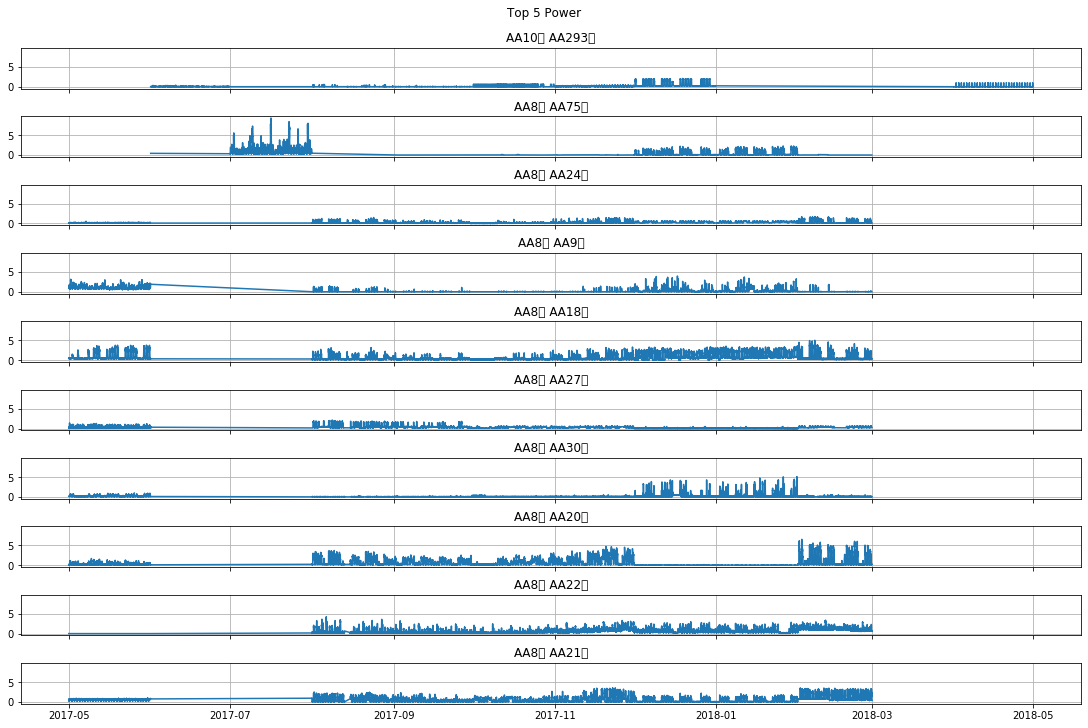

In [143]:
import matplotlib.pylab as plt
plt.figure(figsize=(15, 10))

fig, axs = plt.subplots(10, figsize=(15,10), constrained_layout=True, sharex=True, sharey=True)
fig.suptitle('Top 5 Power')

for i, j in enumerate(list(new_frame['user'].value_counts().index)[:10]):
    axs[i].plot(new_frame[new_frame['user'] == j]['datetime'], new_frame[new_frame['user'] == j]['유효전력'])
    axs[i].set_title(j)

# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()

/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)


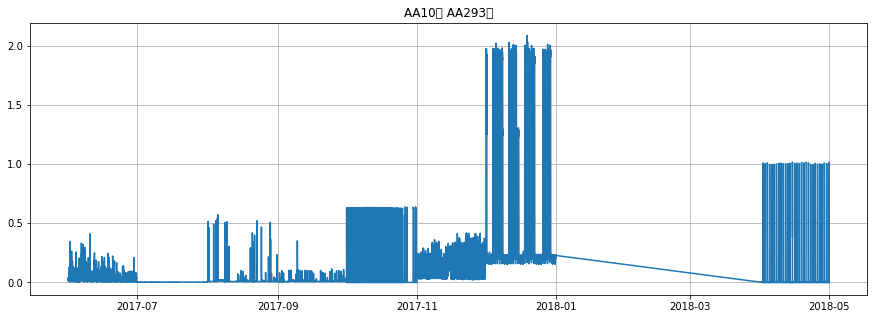

In [144]:
import matplotlib.pylab as plt
plt.figure(figsize=(15, 5))
plt.plot(new_frame[new_frame['user'] == 'AA10동 AA293호']['datetime'], new_frame[new_frame['user'] == 'AA10동 AA293호']['유효전력'])
plt.title('AA10동 AA293호')
plt.show()